In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "data-expo-2009-airline-on-time-data"

In [2]:
# Importing the libraries we need
library(dplyr)
library(ggplot2)
library(scales)
library(stringr)
library(maps)
library(mapproj)
library(usdata)
library(ggrepel)
library(tidyverse)
library(ggforce)
library(ggthemes)
library(usmap)
devtools::install_github("UrbanInstitute/urbnmapr")
library(urbnmapr)
library(egg)
library(treemapify)
library(ggridges)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map





vctrs (0.6.2 -> 0.6.3) [CRAN]


Installing 1 packages: vctrs

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘vctrs’ had non-zero exit status”


✔  checking for file ‘/tmp/RtmprjGbGg/remotese6dc83192/UrbanInstitute-urbnmapr-ef9f448/DESCRIPTION’
─  preparing ‘urbnmapr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
     NB: this package now depends on R (>= 3.5.0)
─  building ‘urbnmapr_0.0.0.9002.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
data_2005 <- read.csv("../input/data-expo-2009-airline-on-time-data/2005.csv")
data_2006 <- read.csv("../input/data-expo-2009-airline-on-time-data/2006.csv")
data_2007 <- read.csv("../input/data-expo-2009-airline-on-time-data/2007.csv")
data_2008 <- read.csv("../input/data-expo-2009-airline-on-time-data/2008.csv")

# Combine data for all years
all_data <- rbind(data_2005, data_2006, data_2007, data_2008)

data_2005 <- NULL
data_2006 <- NULL
data_2007 <- NULL
data_2008 <- NULL

airports <- read.csv("../input/data-expo-2009-airline-on-time-data/airports.csv")
carriers <- read.csv("../input/data-expo-2009-airline-on-time-data/carriers.csv")

In [4]:
# Check the head of all_data (first 6 rows)
head(all_data$Origin)

# Check the length of all_data (number of rows)
nrow(all_data)

# Check the shape of all_data (number of rows and columns)
dim(all_data)

# Check the column names of all_data
colnames(all_data)

[1] "BOS" "BOS" "BOS" "BOS" "ORD" "ORD"

[1] 24124950

[1] 24124950       29

[1] "Year"              "Month"             "DayofMonth"       
 [4] "DayOfWeek"         "DepTime"           "CRSDepTime"       
 [7] "ArrTime"           "CRSArrTime"        "UniqueCarrier"    
[10] "FlightNum"         "TailNum"           "ActualElapsedTime"
[13] "CRSElapsedTime"    "AirTime"           "ArrDelay"         
[16] "DepDelay"          "Origin"            "Dest"             
[19] "Distance"          "TaxiIn"            "TaxiOut"          
[22] "Cancelled"         "CancellationCode"  "Diverted"         
[25] "CarrierDelay"      "WeatherDelay"      "NASDelay"         
[28] "SecurityDelay"     "LateAircraftDelay"

In [5]:
# For Airports
airports <- airports %>% mutate_if(is.character, as.factor)

df = merge(x=all_data, y=airports, by.x = "Origin", by.y = "iata", all.x=TRUE)
colnames(df)[30] <- 'origin_airport'
colnames(df)[31] <- 'origin_city'
colnames(df)[32] <- 'origin_state'
colnames(df)[33] <- 'origin_country'
colnames(df)[34] <- 'origin_lat'
colnames(df)[35] <- 'origin_long'

In [6]:
df = merge(x=df, y=airports, by.x = "Dest", by.y = "iata", all.x=TRUE)
colnames(df)[36] <- 'dest_airport'
colnames(df)[37] <- 'dest_city'
colnames(df)[38] <- 'dest_state'
colnames(df)[39] <- 'dest_country'
colnames(df)[40] <- 'dest_lat'
colnames(df)[41] <- 'dest_long'

In [7]:
airports <- NULL # These are removed for memory usage reducing
all_data <- NULL

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1688147,90.2,31868171,1702.0,49794016,2659.3
Vcells,664342014,5068.6,2002438380,15277.4,2498047240,19058.6


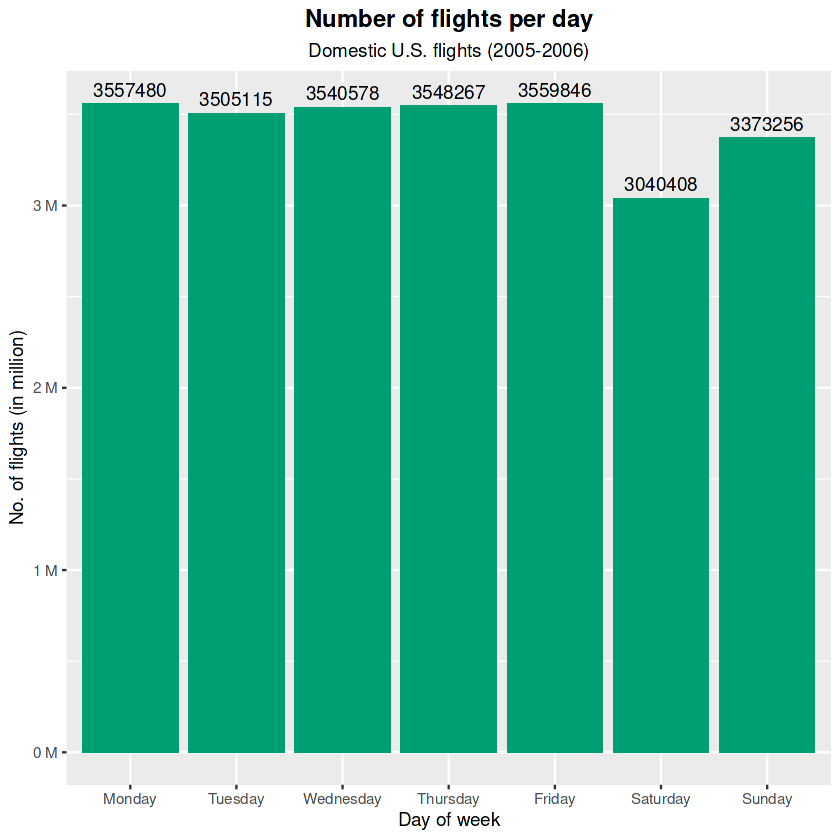

In [8]:
### 1st plot ###
df_1 <-as.data.frame(df$DayOfWeek)
colnames(df_1) <- c("DayOfWeek")

df_1 <- df_1 %>%  
    mutate(DayOfWeek = case_when(
        DayOfWeek == 1 ~ 'Monday',
        DayOfWeek == 2 ~ 'Tuesday',
        DayOfWeek == 3 ~ 'Wednesday',
        DayOfWeek == 4 ~ 'Thursday', 
        DayOfWeek == 5 ~ 'Friday', 
        DayOfWeek == 6 ~ 'Saturday', 
        DayOfWeek == 7 ~ 'Sunday'
    ))

plot_1 <- ggplot(df_1, aes(x=(DayOfWeek))) +
    geom_bar(fill='#009E73') +  # This color code is from the colorblind friendly
                                # "cbPalette" palette
    ylab("No. of flights (in million)") + 
    xlab("Day of week") +
    labs(subtitle = "Domestic U.S. flights (2005-2006)") +
    geom_text(stat = 'count', aes(label = ..count..), position = position_dodge(width = 1), vjust = -0.5) +
    ggtitle("Number of flights per day") + 
    
    theme(plot.title = element_text(hjust = 0.5, 
                                    face = "bold", 
                                    size = 14
                                    ),
          plot.subtitle = element_text(hjust = 0.5)) +
    scale_x_discrete(limits = c("Monday", "Tuesday", "Wednesday", 
                                "Thursday", "Friday", "Saturday", 
                                "Sunday"
                                )) + 
    scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)
    )

df_1 <- NULL
plot_1
gc() # Cleaning the unused memory

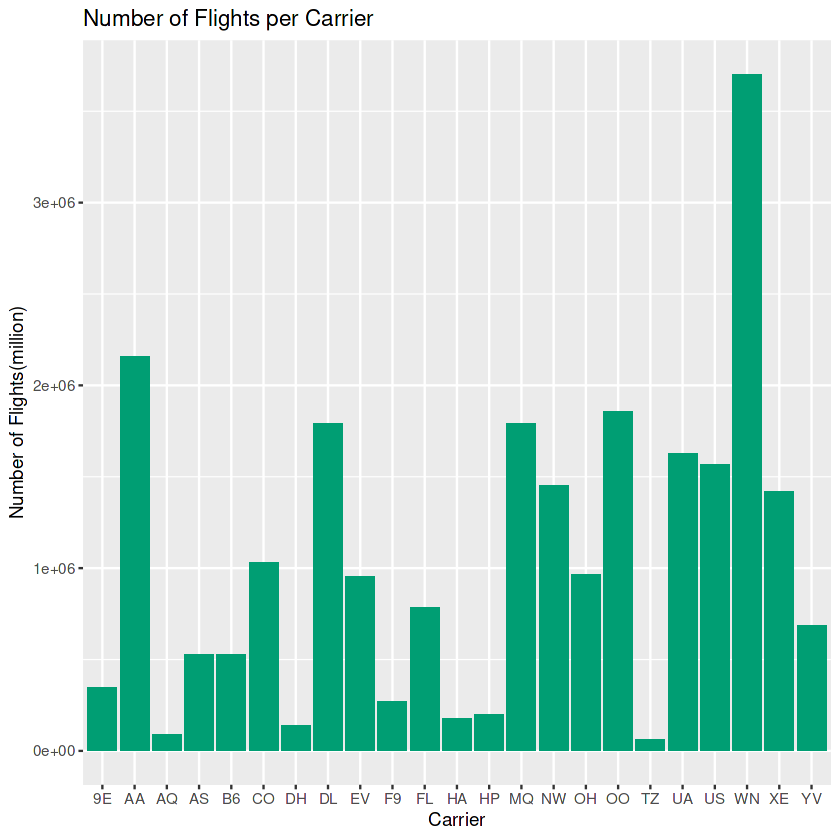

In [9]:
# Load the required packages
library(dplyr)
library(ggplot2)

# Count number of flights per carrier
num_flights <- df %>% 
  group_by(UniqueCarrier) %>% 
  summarise(NumFlights = n())

# Create bar chart
ggplot(num_flights, aes(x = UniqueCarrier, y = NumFlights)) +
  geom_col(fill = "#009E73") +
  ggtitle(("Number of Flights per Carrier")) +
  xlab("Carrier") +
  ylab("Number of Flights(million)")

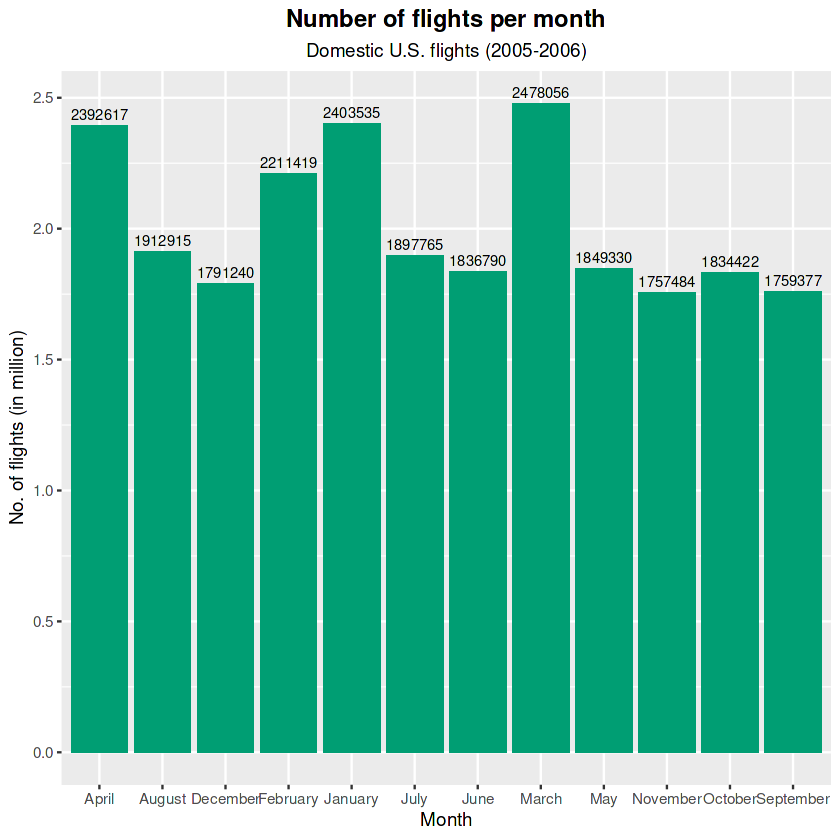

In [10]:
# Convert the 'FlightDate' column to Date format
df$FlightDate <- as.Date(paste(df$Year, df$Month, df$DayofMonth, sep = "-"))

# Create a new column for months
df$Month <- format(df$FlightDate, "%B")

# Count the number of flights for each month
df_month <- df %>%
  group_by(Month) %>%
  summarise(NumFlights = n())

# Plot for months
plot_month <- ggplot(df_month, aes(x = Month, y = NumFlights)) +
  geom_bar(fill = '#009E73', stat = 'identity') +
  ylab("No. of flights (in million)") +
  xlab("Month") +
  labs(subtitle = "Domestic U.S. flights (2005-2006)") +
  geom_text(aes(label = NumFlights), vjust = -0.5, size = 3, color = "black") +
  ggtitle("Number of flights per month") +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 0.5)
  ) +
  scale_y_continuous(labels = scales::comma_format(scale = 1e-6))

# Print the plot
print(plot_month)

SpecialCategory,TotalFlights,DistinctDays,AvgFlightsPerDay
<chr>,<int>,<int>,<dbl>
Holiday,306767,16,19172.94
Weekday,17404519,852,20427.84
Weekend,6413664,348,18430.07


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1711211,91.4,25494537,1361.6,49794016,2659.3
Vcells,724706949,5529.1,2002438380,15277.4,2498047240,19058.6


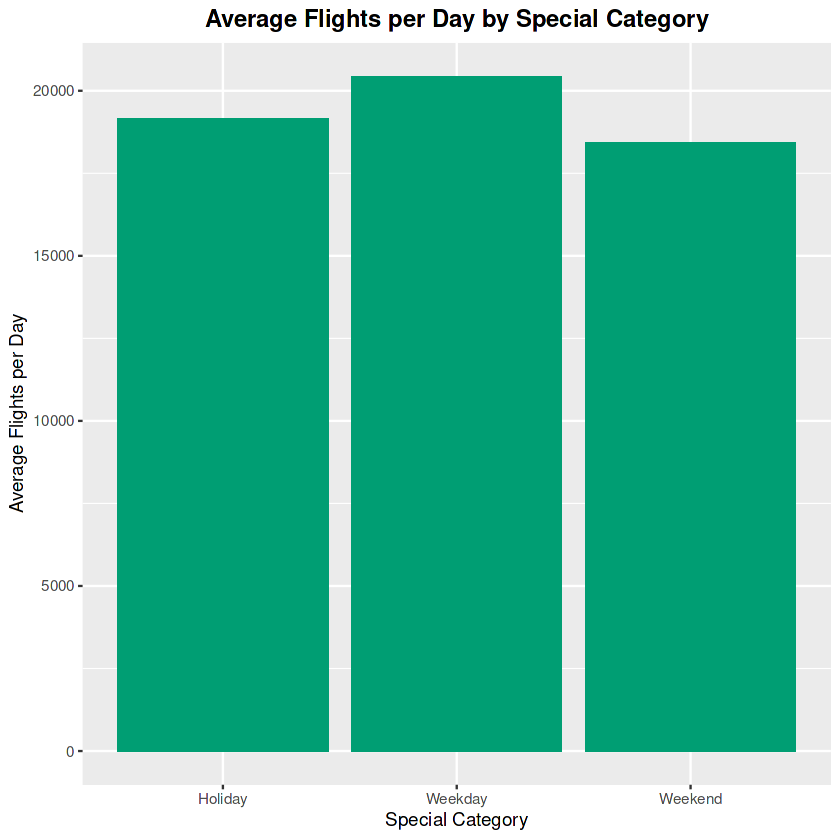

In [11]:
library(ggplot2)
library(dplyr)
library(lubridate)

# Convert FlightDate to Date format
df$FlightDate <- as.Date(df$FlightDate)

# Create a new column for special categories (holidays, weekends, weekdays)
df <- df %>%
  mutate(SpecialCategory = case_when(
    wday(FlightDate) %in% c(1, 7) ~ "Weekend",
    month(FlightDate) == 1 & day(FlightDate) == 1 ~ "Holiday",             # New Year's Day
    month(FlightDate) == 2 & day(FlightDate) == 14 ~ "Holiday",            # Valentine's Day
    month(FlightDate) == 7 & day(FlightDate) == 4 ~ "Holiday",             # Independence Day
    month(FlightDate) == 11 & day(FlightDate) == 11 ~ "Holiday",           # Veterans Day
    month(FlightDate) == 12 & day(FlightDate) == 25 ~ "Holiday",           # Christmas Day
    month(FlightDate) == 12 & day(FlightDate) == 31 ~ "Holiday",           # New Year's Eve
    FlightDate %in% as.Date(c("2005-09-05", "2006-09-04", "2007-09-03")) ~ "Holiday",  # Labor Day
    TRUE ~ "Weekday"
  ))


# Calculate the total number of flights and distinct days for each special category
df_daily <- df %>%
  group_by(SpecialCategory) %>%
  summarize(TotalFlights = n(),
            DistinctDays = n_distinct(FlightDate))

# Calculate the average flights per day for each special category
df_daily <- df_daily %>%
  mutate(AvgFlightsPerDay = TotalFlights / DistinctDays)

# Plot the average flights per day
plot_daily <- ggplot(df_daily, aes(x = SpecialCategory, y = AvgFlightsPerDay)) +
  geom_bar(stat = "identity", fill = "#009E73") +
  ylab("Average Flights per Day") +
  xlab("Special Category") +
  ggtitle("Average Flights per Day by Special Category") +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14)
  )

# Print the plot
print(plot_daily)
df_daily
gc()

In [12]:
colnames(df)

[1] "Dest"              "Origin"            "Year"             
 [4] "Month"             "DayofMonth"        "DayOfWeek"        
 [7] "DepTime"           "CRSDepTime"        "ArrTime"          
[10] "CRSArrTime"        "UniqueCarrier"     "FlightNum"        
[13] "TailNum"           "ActualElapsedTime" "CRSElapsedTime"   
[16] "AirTime"           "ArrDelay"          "DepDelay"         
[19] "Distance"          "TaxiIn"            "TaxiOut"          
[22] "Cancelled"         "CancellationCode"  "Diverted"         
[25] "CarrierDelay"      "WeatherDelay"      "NASDelay"         
[28] "SecurityDelay"     "LateAircraftDelay" "origin_airport"   
[31] "origin_city"       "origin_state"      "origin_country"   
[34] "origin_lat"        "origin_long"       "dest_airport"     
[37] "dest_city"         "dest_state"        "dest_country"     
[40] "dest_lat"          "dest_long"         "FlightDate"       
[43] "SpecialCategory"

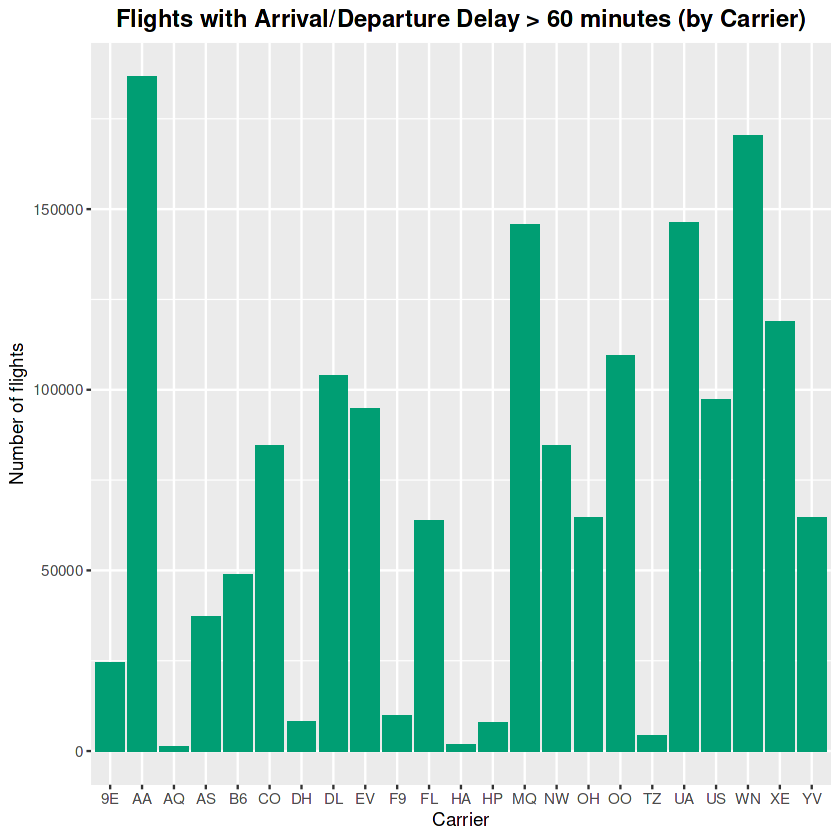

In [13]:
# Filter flights with Arrival/Departure delay greater than 60 minutes
df_delayed <- df %>%
  filter(ArrDelay > 60 | DepDelay > 60)

# Count the number of flights with delay greater than 60 minutes by carrier
df_delayed_carrier <- df_delayed %>%
  group_by(UniqueCarrier) %>%
  summarise(NumFlights = n())

# Plot the flights with delay greater than 60 minutes by carrier
plot_delayed_carrier <- ggplot(df_delayed_carrier, aes(x = UniqueCarrier, y = NumFlights)) +
  geom_bar(stat = "identity", fill = '#009E73') +
  ylab("Number of flights") +
  xlab("Carrier") +
  ggtitle("Flights with Arrival/Departure Delay > 60 minutes (by Carrier)") +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14)
  )

# Print the plot
print(plot_delayed_carrier)

In [14]:
library(dplyr)

# Count total flights for each origin-destination pair
flight_counts <- df %>%
  group_by(Origin, Dest) %>%
  summarise(TotalFlights = n()) %>%
  arrange(desc(TotalFlights))

# Select top 10 pairs with highest flight count
top_10_pairs <- head(flight_counts, 10)

# Print the top 10 pairs
print(top_10_pairs)


`summarise()` has grouped output by 'Origin'. You can override using the
`.groups` argument.


# A tibble: 10 × 3
# Groups:   Origin [8]
   Origin Dest  TotalFlights
   <chr>  <chr>        <int>
 1 SAN    LAX          46264
 2 LAX    SAN          46207
 3 LAX    LAS          44610
 4 LAS    LAX          43510
 5 BOS    LGA          41879
 6 LGA    BOS          41847
 7 OGG    HNL          41390
 8 HNL    OGG          41155
 9 DCA    LGA          40279
10 LGA    DCA          40259


old-style crs object detected; please recreate object with a recent sf::st_crs()



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1837197,98.2,16316504,871.4,49794016,2659.3
Vcells,771361584,5885.1,2002438380,15277.4,2498047240,19058.6


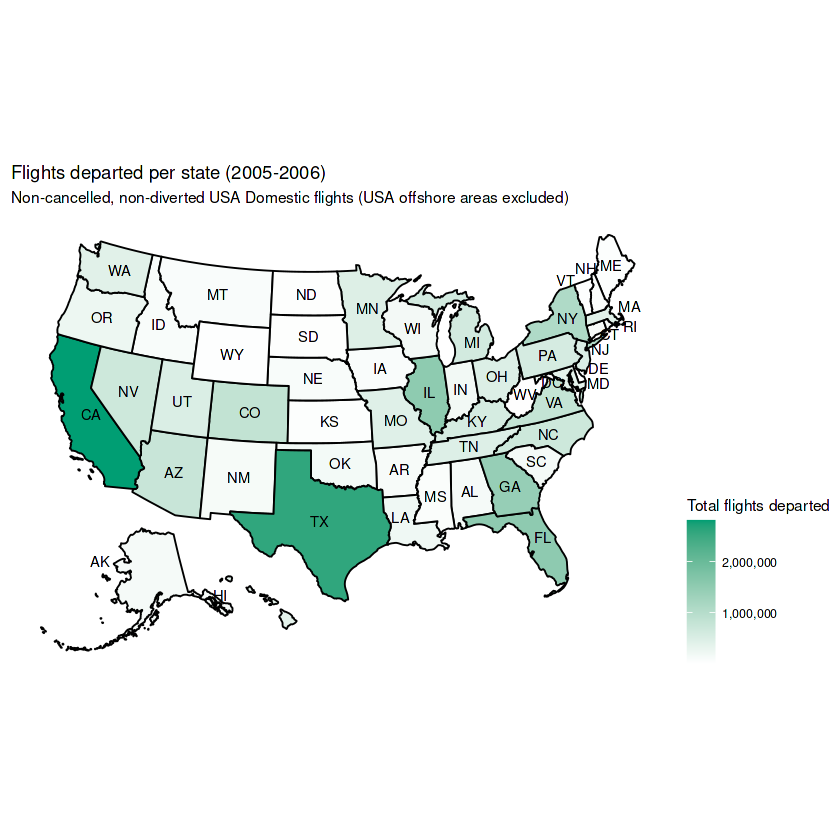

In [15]:
### 3rd plot ###
df_3 <- df %>%
    filter(origin_country == 'USA', dest_country == 'USA', Diverted != 1, Cancelled != 1) %>%
    select(origin_state)

df_3 <- df_3 %>% 
    group_by(origin_state) %>% 
    tally()

colnames(df_3) <- c("state", "flights")
df_3 <- na.omit(df_3) # Excluding the offshore flights from and towards USA
                      # controlled regions (Micronesia etc.)

df_3 <- subset(df_3, state!="PR" & state!="VI") # Excluding Puerto Rico & 
                                                # Virgin islands

df_3$state <- lapply(df_3$state, function(x) abbr2state(x))
df_3$state = tolower(df_3$state)

plot_3 <- plot_usmap(data = df_3, values = "flights", color = "black") + 
    scale_fill_continuous(low = "white", high = "#009E73", name = "Total flights departed", label = scales::comma) + 
    theme(legend.position = "right") +
    labs(title = "Flights departed per state (2005-2006)",
         subtitle = "Non-cancelled, non-diverted USA Domestic flights (USA offshore areas excluded)")+
    geom_sf_text(
        data = get_urbn_labels(map = "states", sf = TRUE), aes(label = state_abbv), size = 3)
    

df_3 <- NULL
plot_3
gc() # Cleaning the unused memory

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1870651,100.0,13053204,697.2,49794016,2659.3
Vcells,771367125,5885.1,2002438380,15277.4,2498047240,19058.6


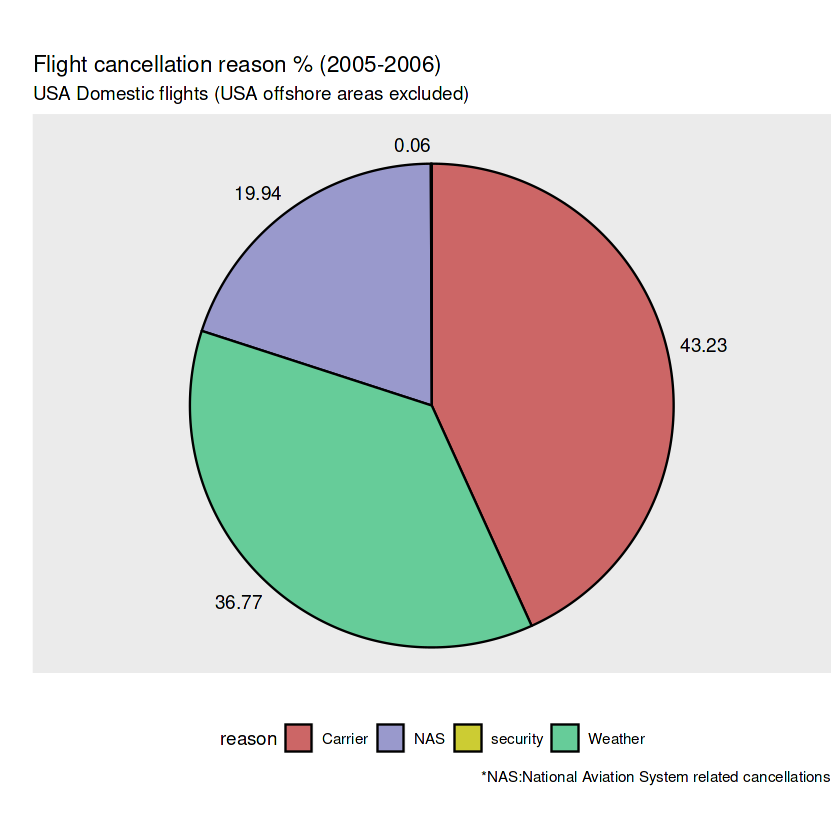

In [16]:
### 4th plot ###
df_4 <- df %>%
    filter(origin_country == 'USA', dest_country == 'USA', Cancelled == 1) %>%
    select(CancellationCode)

df_4 <- df_4 %>% 
    group_by(CancellationCode) %>% 
    tally()

colnames(df_4) <- c("reason", "cancellations")

df_4$reason <- as.factor(df_4$reason)
df_4$cancellations <- as.numeric(df_4$cancellations)

df_4 <- df_4 %>%  
    mutate(reason = case_when(
        reason == "A" ~ 'Carrier',
        reason == "B" ~ 'Weather',
        reason == "C" ~ 'NAS',
        reason == "D" ~ 'security'
    ))

df_4$Label <- round(df_4$cancellations/sum(df_4$cancellations)*100, 2)

df_4 <- df_4 %>% 
    mutate(end = 2 * pi * cumsum(cancellations)/sum(cancellations),
           start = lag(end, default = 0),
           middle = 0.5 * (start + end),
           hjust = ifelse(middle > pi, 1, 0),
           vjust = ifelse(middle < pi/2 | middle > 3 * pi/2, 0, 1))


plot_4 <- ggplot(df_4) + 
    geom_arc_bar(aes(x0 = 0, y0 = 0, r0 = 0, r = 1,
                     start = start, end = end, fill = reason)) +
    geom_text(aes(x = 1.05 * sin(middle), y = 1.05 * cos(middle), label = Label,
                  hjust = hjust, vjust = vjust)) +
    coord_fixed() +
    scale_x_continuous(limits = c(-1.5, 1.5),  # Adjust so labels are not cut off
                       name = "", breaks = NULL, labels = NULL) +
    scale_y_continuous(limits = c(-1, 1.1),    # Adjust so labels are not cut off
                       name = "", breaks = NULL, labels = NULL) +
    labs(title = "Flight cancellation reason % (2005-2006)",
         subtitle = "USA Domestic flights (USA offshore areas excluded)",
         caption = "*NAS:National Aviation System related cancellations") +
    scale_fill_manual(values=c("#CC6666", "#9999CC", "#CCCC33", "#66CC99")) +
    theme(legend.position="bottom")

df_4 <- NULL
plot_4
gc() # Cleaning the unused memory/

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


season,reason,cancelled_flights
<chr>,<chr>,<int>
NA,Carrier,207859
NA,NAS,95905
NA,Weather,176796
NA,security,294


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1879193,100.4,10442564,557.7,49794016,2659.3
Vcells,771383974,5885.2,2002438380,15277.4,2498047240,19058.6


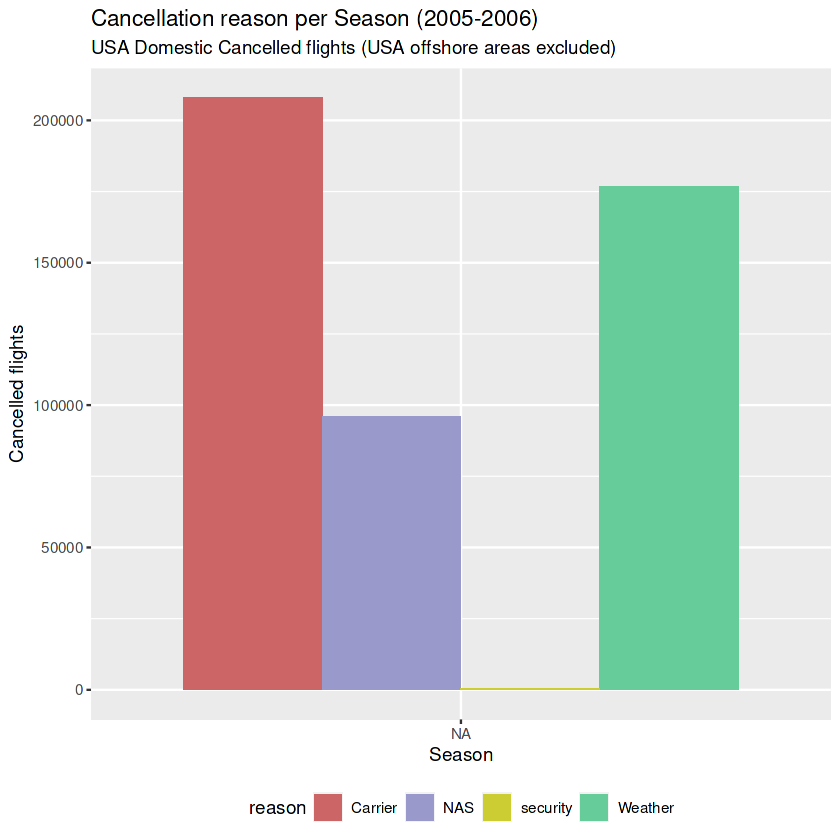

In [17]:
### Plot 5 ###
df_5 <- df %>%
    filter(origin_country == 'USA', dest_country == 'USA', Cancelled == 1) %>%
    select(Month, CancellationCode)

df_5 <- df_5 %>% 
    group_by(Month, CancellationCode) %>% 
    tally()

df_5 <- df_5 %>%  
    mutate(CancellationCode = case_when(
        CancellationCode == "A" ~ 'Carrier',
        CancellationCode == "B" ~ 'Weather',
        CancellationCode == "C" ~ 'NAS',
        CancellationCode == "D" ~ 'security'))

df_5 <- df_5 %>%  
    mutate(Month = case_when(
        Month == 1 ~ 'Winter',
        Month == 2 ~ 'Winter',
        Month == 3 ~ 'Spring',
        Month == 4 ~ 'Spring',
        Month == 5 ~ 'Spring',
        Month == 6 ~ 'Summer',
        Month == 7 ~ 'Summer',
        Month == 8 ~ 'Summer', 
        Month == 9 ~ 'Autumn', 
        Month == 10 ~ 'Autumn', 
        Month == 11 ~ 'Autumn', 
        Month == 12 ~ 'Winter'))

colnames(df_5) <- c("season", "reason", "cancelled_flights")

df_5 <- df_5 %>% 
    group_by(season, reason) %>% 
    summarize(cancelled_flights = sum(cancelled_flights)) 

plot_5 <- ggplot(df_5, aes(x=season, y=cancelled_flights, fill=reason)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    xlab("Season") + 
    ylab("Cancelled flights") +
    labs(title = "Cancellation reason per Season (2005-2006)",
      subtitle = "USA Domestic Cancelled flights (USA offshore areas excluded)") +
    scale_fill_manual(values=c("#CC6666", "#9999CC", "#CCCC33", "#66CC99")) +
    theme(legend.position="bottom")
df_5
df_5 <- NULL
plot_5
gc() # Cleaning the unused memory

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1869638,99.9,32059791,1712.2,50093422,2675.3
Vcells,771352720,5885.0,2306949814,17600.7,2874779664,21932.9


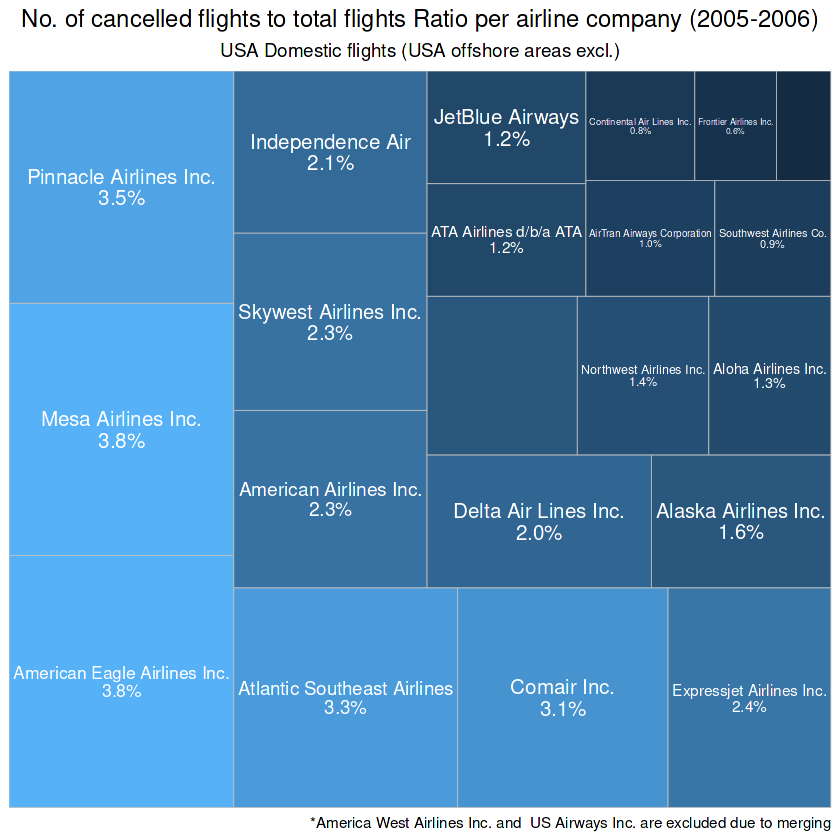

In [18]:
### Plot 6 ###
df_6 <- df %>% select(Cancelled, UniqueCarrier)
df_6 <- merge(x=df, y=carriers, by.x = "UniqueCarrier", by.y = "Code", all.x=TRUE)

# Getting a copy of "df_6"
df_6_1 <- df_6

df_6 <- df_6 %>% mutate_if(is.character, as.factor)

df_6 <- df_6 %>% 
    group_by(Description) %>% 
    tally()

colnames(df_6) = c("company", "total_flights")

# Manipulating the 2nd dataframe
df_6_1 <- df_6_1 %>%
    filter(Cancelled == 1) %>%
    select(Description, Cancelled)

df_6_1 <- df_6_1 %>% 
    group_by(Description) %>% 
    tally()

colnames(df_6_1) <- c("company", "canc_flights")

df_6 = merge(x=df_6, y=df_6_1, by.x = "company", by.y = "company", all.x=TRUE)

df_6$ratio <- round(df_6$canc_flights/df_6$total_flights, 3)
df_6$total_flights <- NULL
df_6$canc_flights <- NULL

df_6 <- df_6[-c(22), ]
df_6 <- df_6[-c(4), ]

plot_6 <- ggplot(df_6, aes(area = ratio, fill = ratio,
               label = paste(company, percent(ratio, accuracy = 0.1), sep = "\n"))) +
    geom_treemap() +
    geom_treemap_text(colour = "white",
                      place = "centre",
                      size = 12) +
    theme(legend.position = "none") +
    labs(
      title = "No. of cancelled flights to total flights Ratio per airline company (2005-2006)",
      subtitle = "USA Domestic flights (USA offshore areas excl.)", 
      caption = "*America West Airlines Inc. and  US Airways Inc. are excluded due to merging") + 
      theme(plot.title = element_text(hjust = 0.5, 
                                    size = 14),
            plot.subtitle = element_text(hjust = 0.5, 
                                      size = 11)) 
df_6 <- NULL
plot_6   
gc() # Cleaning the unused memory